# Source Code For DBSCAN

#### Importing the Image

In [1]:
from PIL import Image

foo = Image.open('C:/Users/As/Downloads/tree.jpg')  
print(foo.size)  

 
 # downsize the image with an ANTIALIAS filter (gives the highest quality)
foo = foo.resize((150,150),Image.ANTIALIAS) 
foo.save('C:/Users/As/Desktop/Data_mining/IMAGES/image_scaled_opt.jpg', optimize=True, quality=95)  # The saved downsized image size is 22.9kb

(275, 183)


C:\Users\As\AppData\Local\Temp\ipykernel_20896\1537035855.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  foo = foo.resize((150,150),Image.ANTIALIAS)


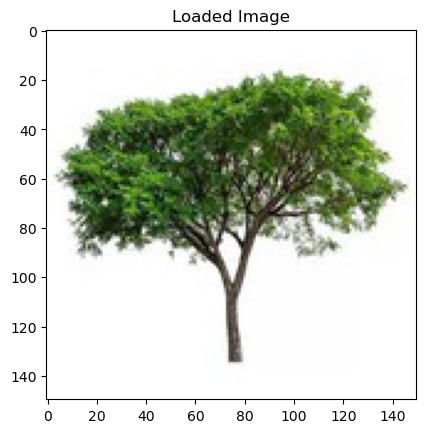

In [2]:
# importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
# importing the DBSCAN Function
from DBSCAN_algorithm import dbscan 
import sys

# Load an image:
image_path = "C:/Users/As/Desktop/Data_mining/IMAGES/image_scaled_opt.jpg"
image = Image.open(image_path)
pixels = image.load()
width, height = image.size


# Display image in notebook:
%matplotlib inline
plt.title('Loaded Image')
plt.imshow(np.asarray(image))


In [3]:
# Below code maps the generated  pixel values to a list
vector_list = []
for y in range(height):
    vector_list.append([])
    for x in range(width):
        vector_list[y].append(list(pixels[x,y]))

print('Image dimensions are : {}x{} pixels'.format(width, height))
print('The vectors from the above dimensions we received are :{} '.format(len(vector_list)))

Image dimensions are : 150x150 pixels
The vectors from the above dimensions we received are :150 


In [4]:
# The following calls the predifined Clustering DBSCAN algorithm and Performs clustering on the vectors:
from DBSCAN_algorithm import dbscan 
dbscan_clusters = dbscan(vector_list, minpts=100, epsilon=10)

In [5]:
#reads vector array and generates an image
def Image_develop(vctrs: list):
    len_of_vec = len(vctrs[0][0])
    #Check supported model and initialize image
    if len_of_vec == 3:
        image = Image.new('RGB', (len(vctrs[0]),len(vctrs)))
    elif len_of_vec == 4:
        image = Image.new('RGBA', (len(vctrs[0]),len(vctrs)))
    else:
        print("Unsupported model")
        sys.exit(1)

    #Map array values to image
    pixel = image.load()
    for y in range(len(vctrs)):
        for x in range(len(vctrs[0])):
            r = int(round(vctrs[y][x][0]))
            g = int(round(vctrs[y][x][1]))
            b = int(round(vctrs[y][x][2]))
            if len_of_vec == 3:
                pixel[x,y] = (r,g,b)
            elif len_of_vec == 4:
                a = int(round(vctrs[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image


# Display the clustered image:
def Display_img(Image,Alg):
    %matplotlib inline
    plt.title(Alg+'Clustered Output')
    plt.imshow(np.asarray(Image))

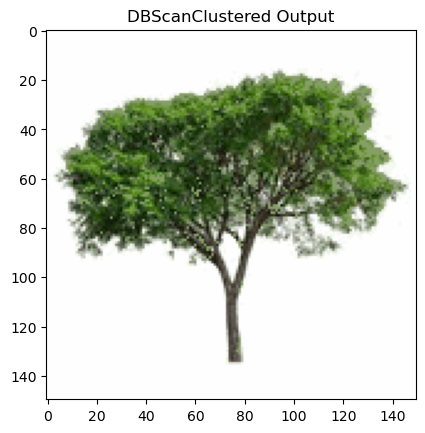

In [6]:
#DBScan Image
Display_img(Image_develop(dbscan_clusters),"DBScan")